<a href="https://colab.research.google.com/github/samiur06/ML-2022-assignment1/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1 
Suppose that you are conducting a scientific experiment where you are observing the effects of one 
variable (x_train.npy and x_test.npy) on the output (y_train.npy and y_test.npy). On visualizing the 
relationship between the variables, you see the following plot: 

Your goal is to come up with a linear regression model that can take the training data (x_train.npy and 
y_train.npy) and model the relationship between the variables x and y. You should implement your 
own version of linear regression either using gradient descent or normal equations. You SHOULD 
NOT use any pre-packaged library such as Sci-Kit Learn.  

Here are somethings to keep in mind for tackling this problem: 
1.  Try to plot this relationship on your own using matplotlib. You can also visualize the test data 
to see if it gives you any clues about the underlying relationship between the variables. 
2.  Use your knowledge gleaned from the previous step to answer the following questions: 

a.  Is the relationship linear? 

b.  Do you need feature engineering to add any non-linearity? 

i.  If so, how can you engineer these features? 

ii.  What are some functions that you can try? 

1.  Plot each of them individually to verify! 


You will need to write a short report detailing your thought process, the code you wrote in Python to 
implement the linear regression model and the equation that models the relationship between x and y 
that you found. You should provide evidence that corroborates your final statement such as plots, 
prediction errors, etc. 
 

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

x_train = np.load("/content/drive/MyDrive/x_train.npy")
y_train = np.load("/content/drive/MyDrive/y_train.npy")
x_test = np.load("/content/drive/MyDrive/x_test.npy")
y_test = np.load("/content/drive/MyDrive/y_test.npy")

print(len(x_train), len(y_train), len(x_test), len(y_test))

100 100 100 100


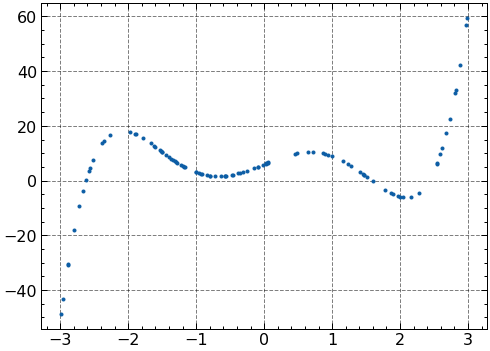

In [ ]:
plt.plot(x_train,y_train,'.')
plt.show()

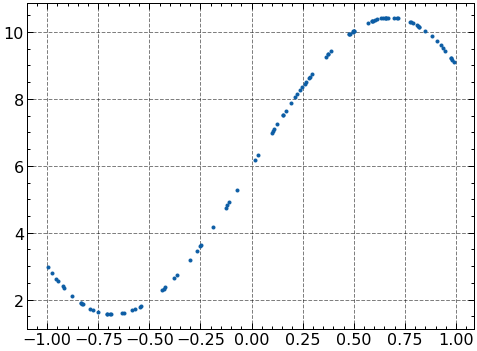

In [ ]:
plt.plot(x_test,y_test,'.')
plt.show()

#### polymonial basis

We assume our prediction to be a 5-th orderpolynomial e.g. $$ f(x) = \sum_{i=0} ^{5} w_i x^i,$$ where $w_i$'s are the coefficients/weights of the polynomial basis functions.

In [ ]:
iteration = len(x_train)

weight = np.ones(6)
J = np.zeros(iteration)
rows, cols = (6,iteration)
Phi = np.array([[0.]*cols]*rows)

In [ ]:
def computeCost(Phi, y, weight):
    h = weight @ Phi
    m = len(y)
    return (np.sum((h-y)**2))/(2*m)

In [ ]:
def gradientDescent(x, y, weight, alpha, i):
    J = np.array([])  #cost function in each iterations
    k = 0
    set_of_weights = np.array([])
    rows, cols = (6,len(x))  # 6 becauee of 5-th order poly
    Phi = np.array([[0.]*cols]*rows)
    for n in range(rows):
        Phi[n,:] = (x.T)**n  # constructing the fixed Phi matrix
    while k < i:
        h = weight @ Phi
        h.reshape(-1)
        for c in range(rows):
            weight[c] -= alpha*(np.sum((h-y)*x**c)/len(y))
        j = computeCost(Phi, y, weight)
        J = np.append(J,[j])
        set_of_weights = np.append(set_of_weights,weight,axis=0)
        k += 1
    set_of_weights = set_of_weights.reshape(i,6)
    return J,j,set_of_weights,weight

minimum of the cost function achieved: 2.475197443777958


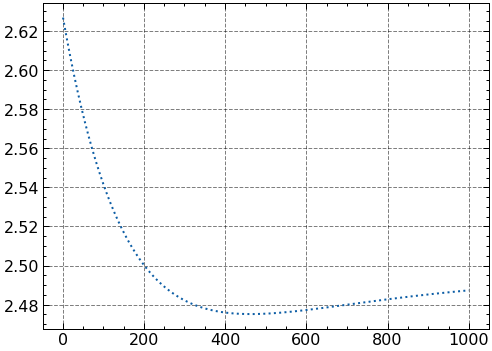

In [ ]:
it = 1000; alpha = 1e-7;
x = np.arange(1,it+1)
# we can moderate this initial weight factors 
# replacing by previously calculated weight factors
weight = np.array([4.5,6.6,0.6,-6.6,-0.06,0.9])
J,j,setW,last_weight = gradientDescent(x_train,y_train,weight,alpha,it)
plt.plot(x,J,':')
print('minimum of the cost function achieved:',min(J))
plt.show()

In [ ]:
# choosing the weight that corresponds to minimum cost function
weight_predicted = setW[np.where(J==min(J))]
weight_predicted

array([[ 4.50110396,  6.59980386,  0.6032721 , -6.60032659, -0.04164434,
         0.8989134 ]])

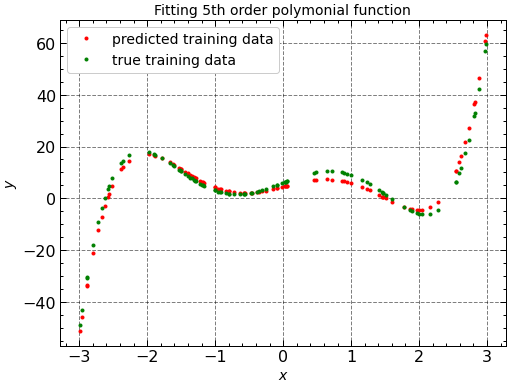

In [ ]:
# defining Phi for training data
for n in range(6):
    Phi[n,:] = (x_train.T)**n
prediction = weight_predicted @ Phi
prediction = np.array(prediction).flatten()

plt.style.use(['science','grid','notebook'])
plt.plot(x_train,prediction,'.',color='r',label='predicted training data')
plt.plot(x_train,y_train,'.',color='g',label='true training data')

font = 14
plt.legend(fontsize=font,loc='upper left', ncol=1)
plt.title('Fitting 5th order polymonial function',fontsize=font)
plt.xlabel('$x$',fontsize=font)
plt.ylabel('$y$',fontsize=font)
plt.show()

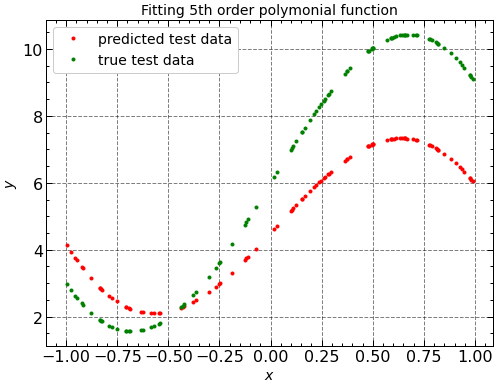

In [ ]:
# defining Phi for test data
for n in range(6):
    Phi[n,:] = (x_test.T)**n
prediction = weight_predicted @ Phi
prediction = np.array(prediction).flatten()

plt.style.use(['science','grid','notebook'])
plt.plot(x_test,prediction,'.',color='r',label='predicted test data')
plt.plot(x_test,y_test,'.',color='g',label='true test data')

font = 14
plt.legend(fontsize=font,loc='upper left', ncol=1)
plt.title('Fitting 5th order polymonial function',fontsize=font)
plt.xlabel('$x$',fontsize=font)
plt.ylabel('$y$',fontsize=font)
plt.show()

**answers to the questions in part 1**

a) the relationship is NOT linear

b) Yes I do need feature engineering to add non-linearity. For this, I noticed that the plot increases and decreses monotonically as x varies. Also, the curve intersects the Y=0 line five times. This motivates me to model a 5-th order polynomial for this given data, a polynomial that has five real roots (intersecting y=0 line five times) and goes from negative infinity to positive infinity, like any other dominant odd-power graph.

### 2
Imagine that you are a realtor in Stillwater. You have data points that correspond to the recent sales 
of different houses in and around Stillwater. Your goal is to help estimate the prices of houses that 
one can use to sell or buy listings. Can you use your knowledge of linear regression to find the best 
regression model? Use your implementation from Question 1 (without any basis functions) to answer 
the following questions. 
1.  What is the average least squares error for the given data using your simple linear regression 
model? 
2.  Which factor has the most effect on the final value? How do you know this? Can you use only 
this feature to predict the price? 
3.  Which factor has the least effect on the final value? How do you know this? What effect does 
removing this feature have on the performance?

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

house_sale = pd.read_csv("/content/drive/MyDrive/Assignment1_Q2_Data.csv")
print(len(house_sale.index),'\n', house_sale.columns)

28 
 Index(['House ID', 'Local Price', 'Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home',
       'Construction type', 'Architecture type', '# Fire places',
       'Price (1000$)'],
      dtype='object')


In [ ]:
house_sale.head()

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


'House ID', 'Local Price', 'Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home',
       'Construction type', 'Architecture type', '# Fire places',
       'Price (1000$)

Introduce bias term, as a column of one's

Be careful with the following step, because running it more than once will add more '00' columns

In [ ]:
house_sale = pd.concat([pd.Series(1, index=house_sale.index, name='00'), house_sale], axis=1)
house_sale.head()

,00,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,1,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,1,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,1,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,1,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


In [ ]:
# defining features and target

X = house_sale.drop(columns='Price (1000$)')
y = house_sale.iloc[:, 13]

In [ ]:
y.head()

0    25.9
1    29.5
2    27.9
3    25.9
4    29.9
Name: Price (1000$), dtype: float64

Normalize the input variables by dividing each column by the maximum values of that column. 
* it makes the algorithm to reach it’s optimum faster. 
* it prevents one column being more dominant than the other(s)

In [ ]:
X_column = np.array(X.columns)
for i in X_column:
    X[i] = X[i]/np.max(X[i])

In [ ]:
# hypothesis function

def hypothesis(theta, X):
    return theta*X

In [ ]:
m = len(house_sale)
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
#     giving sum across rows, i.e. sum of theta_i * x_i = y1 
#     i running from 0 to the max number of x's; 0 is for bias
    y1=np.sum(y1, axis=1)
    return np.sum((y1-y)**2)/(2*m)

In [ ]:
def gradientDescent(X, y, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    theta = np.zeros(len(X.columns))
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/(2*m))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

We check the minimized cost function for different alpha values with 100 iterations.

In [ ]:
for alpha in np.arange(0.1,1.0,0.1):
    J, j, theta = gradientDescent(X,y,alpha,100)
    print(alpha,'  ',j)

0.1    23.902671572825586
0.2    15.23707496564796
0.30000000000000004    10.78034827697899
0.4    8.327310435900303
0.5    6.928363045823343
0.6    6.103000874752051
0.7000000000000001    5.594838401360198
0.8    5.264429141887861
0.9    5173765.804492781


It is evident that optimized alpha is between 0.8 to 0.9

finding optimized value for alpha, the learning rate, up to 3 order for iteraion = 500

In [ ]:
jset = []
alphaset = []
for alpha in np.arange(0.865,0.875,0.001):
    J, j, theta = gradientDescent(X,y,alpha,500)
    jset.append(j)
    alphaset.append(alpha)
for i in range(len(jset)):
    if jset[i] == min(jset):
        print(alphaset[i],'  ',jset[i])

0.874    3.2714213815158333


In [ ]:
J, j, theta = gradientDescent(X,y,0.874,500)

In [ ]:
print(j, theta)

3.2714213815158333 [ 2.7673941  -8.37072063 20.79514311 25.78909551  7.41738911 25.24147393
  4.13573337  1.00393823 -2.54366743 -7.82087108  4.63310598  4.39193817
  3.07047111]


In [ ]:
max(theta)

25.78088294963805

In [ ]:
np.round_(theta,2)

array([ 2.77, -8.37, 20.8 , 25.78,  7.42, 25.23,  4.14,  1.02, -2.52,
       -7.82,  4.64,  4.39,  3.07])

In [ ]:
np.where(theta==np.max(theta))

(array([3]),)

In [ ]:
# ascending order of the absolute theta magnitudes
flat_theta = abs(theta).flatten()
flat_theta.sort()
flat_theta

array([ 1.00393823,  2.54366743,  2.7673941 ,  3.07047111,  4.13573337,
        4.39193817,  4.63310598,  7.41738911,  7.82087108,  8.37072063,
       20.79514311, 25.24147393, 25.78909551])

In [ ]:
# three largest contributing features from three largest theta values
for i in range(3):
    print(X_column[np.where(theta == flat_theta[-i-1])])

['Bathrooms']
['Living area']
['Local Price']


In [ ]:
most_effect_index = np.where(theta == flat_theta[-1])
mostX = X[X_column[most_effect_index]]
mostY = theta[most_effect_index] * mostX / np.max(mostX)
mostY = np.sum(mostY, axis=1)

cost_most = np.sum((mostY - y)**2)/(2*m) 
print("Cost functional value for only the dominant term:",cost_most)

Cost functional value for only the dominant term is 365.51153319970865


In [ ]:
# three smallest contributing features from three smallest theta values
for i in range(3):
    print(X_column[np.where(theta == flat_theta[i])])

['# Rooms']
[]
['00']


In [ ]:
least_effect_index = np.where(theta == flat_theta[0])
leastX = X[X_column[least_effect_index]]
leastY = theta[least_effect_index] * leastX / np.max(leastX)
leastY = np.sum(leastY, axis=1)

cost_least = np.sum((leastY - y)**2)/(2*m) 
print("Cost functional value for only the least contributing term:",cost_least)

Cost functional value for only the least contributing term: 798.0278693137838


plotting the results of the predicted values from the set of theta computed, true values, values with only the most effect term and predicted values dropping the lesat effect term

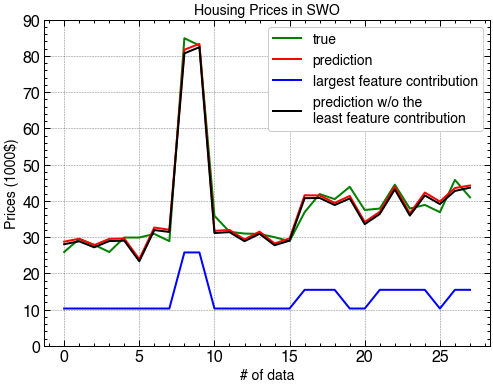

In [ ]:
plt.style.use(['science', 'notebook', 'grid'])
plt.rcParams.update({'font.family':'Helvetica'})

x=np.arange(0,28)
y1 = hypothesis(theta, X)
prediction = np.sum(y1, axis=1)
plt.plot(x,y[x],color='g',label='true')
plt.plot(x,prediction[x],color='r',label='prediction')
plt.plot(x,mostY[x],color='blue',label='largest feature contribution')
plt.plot(x,prediction[x]-leastY[x],color='k',label='prediction w/o the \nleast feature contribution')

font = 14
plt.legend(fontsize=font,loc='upper right', ncol=1)
plt.title('Housing Prices in SWO',fontsize=font)
plt.xlabel('# of data',fontsize=font)
plt.ylabel('Prices (1000$)',fontsize=font)
plt.ylim(top=90,bottom=0)
plt.show()

**answers to questions in part 2**

1. the average least squares error is the j value we computed in the end, which is 1.022

2. From the list of theta parameters, we see that largest three values are 25.78, 25.23, and 20.80, that correspond to ['Bathrooms'] ['Living area'] ['Local Price'] If we only consider ['Bathrooms'], cost functional value is 365.51. We can see the blue lines on the graph for this contribution. It is not sufficient enough alone.

3. ['# Rooms'] has the least contribution with theta = 1.02. We can see that black and red lines overlap on the figure. Without this term, there is almost no change in the prediction.

### 3
Implement a locally weighted linear regression model for the data from Question 1. Refer to Slide 33 
from Lecture 4 for reference. You should implement your own version of linear regression either using 
gradient descent or normal equations. You SHOULD NOT use any pre-packaged library such as 
Sci-Kit Learn.  
 
Answer the following questions: 
1.  Do you need any basis functions when using the locally weighted approach? 
2.  What is the difference between this implementation and the one for Question 1? 

theta values taken from the weight factors found in problem 1 (saved as weight_predicted)

With $x \in \mathbb{R}$, $$w_i(x) =exp{(-\frac{(x - x_{train}[i])^2}{2\tau ^2})} $$
this can give the prediction of some $x$ number.

In [ ]:
x_train = np.load("/content/drive/MyDrive/x_train.npy")
bias = np.ones(100)
# bias = bias.reshape(100,1)
print(bias.shape)
print(x_train.shape)
x_trn_bias = np.append(bias,x_train)
x_trn_bias = x_trn_bias.reshape(2,100)
x_trn_bias[1,80]

(100,)
(100, 1)


1.5125390163745092

In [ ]:
theta = np.ones(2)
theta = theta.reshape(1,2)

h = theta @ x_trn_bias
theta

array([[1., 1.]])

In [ ]:
def w(x,tau):
    return np.exp((-(x-x_train)**2) / (2* tau**2))

def modified_cost(x,tau,h,y):
    m = len(x)
    return np.sum( w(x,tau)*(h-y)**2 )/(2*m)

def gradientDescent(x,y,tau,theta_init,alpha,it):
    theta = theta_init
    m = len(x)
    J = np.array([])
    k = 0
    set_theta = np.array([])
    bias = np.ones(100)
#     x is the training data
#     x_train_bias is training data plus ones that will give us the bias terms also
    x_train_bias = np.append(bias,x)
    x_train_bias = x_trn_bias.reshape(2,100)
    while k<it:
        h = theta @ x_train_bias
        j = modified_cost(x,tau,h,y)
        theta[0] -= alpha*(np.sum((h-y)))/m
        theta[1] -= alpha*(np.sum((h-y)*x))/m
        J = np.append(J,[j])
        set_theta = np.append(set_theta,theta)
        k += 1
    for i in range(it):
        organized_thetas[1,i] = set_theta[2*i+1]
        organized_thetas[0,i] = set_theta[2*i]
    return J,j,organized_thetas,theta

In [ ]:
ratio_yx =[]
for i in range(len(y_train)):
    ratio_yx = np.append(ratio_yx,y_train[i]/x_train[i])
np.mean(ratio_yx)

4.460947385803155

heuristically we will use this np.mean(ratio_yx) as our initial theta [1] value and let the bias be some random const

In [ ]:
theta_init = np.array([[1,np.mean(ratio_yx)]])

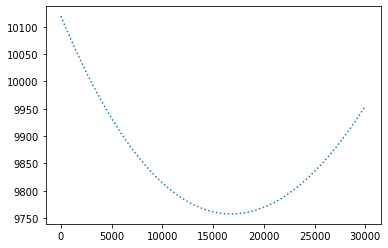

In [ ]:
it = 30000; alpha = 1e-6;
theta_init = np.array([1,np.mean(ratio_yx)]); tau = 0.1; 
x = np.arange(1,it+1)
J,j,organized_thetas,theta = gradientDescent(x_train,y_train,tau,theta_init,alpha,it)
plt.plot(x,J,':')
plt.show()

In [ ]:
print('minimum of the cost function achieved:',min(J),'\nthe location of this value in the array of cost:',np.where(J==min(J)))


minimum of the cost function achieved: 9757.584848835091 
the location of this value in the array of cost: (array([16796]),)


* all is good, just fix set theta dimension so that i. can get back theta valueS
* Then compare with test data
* prepare to combine and make github file


In [ ]:
optimizedTheta = organized_thetas[:,16796]
h = optimizedTheta @ x_trn_bias
modified_cost(x_train,tau,h,y_train)

9757.584849024122

here we checked that optimized theta value indeed provided the minimum j value.

### test data

In [ ]:
x_test = np.load("/content/drive/MyDrive/x_test.npy")
bias = np.ones(100)
x_test = np.append(bias,x_test)
x_test = x_test.reshape(2,100)
h = optimizedTheta @ x_test

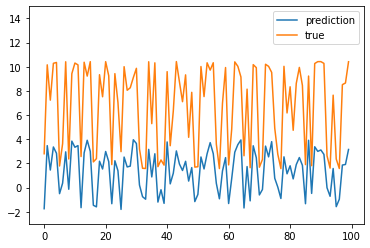

In [ ]:
x = np.arange(100)
plt.plot(x,h[x],label='prediction')
plt.plot(x,y_test[x],label='true')
plt.legend(loc='upper right')
plt.ylim(top=15,bottom=-3)
plt.show()

**answers to questions in part 3**
1. we didn't need any basis function, since weight was applied on linear relationship between y and x.
2. This implementation did have a large error compared to the solution I 
provided for the first problem